Setup

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 1. Load the csv file and show first 5 rows.

In [332]:
df = pd.read_csv("sales_data.csv")
df.head()

,date,region,category,product,units_sold,unit_price
0,2021-01-01,North,Electronics,Laptop,25,900
1,2021-01-01,North,Furniture,Chair,45,80
2,2021-01-01,South,Electronics,Smartphone,60,500
3,2021-01-01,East,Clothing,T-Shirt,55,20
4,2021-01-01,West,Furniture,Desk,30,200


# 2. Print out basic information. Use `info` and `describe`

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41 non-null     object
 1   region      41 non-null     object
 2   category    41 non-null     object
 3   product     41 non-null     object
 4   units_sold  41 non-null     int64 
 5   unit_price  41 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ KB


In [334]:
df.describe()

,units_sold,unit_price
count,41.000000,41.000000
mean,43.512195,304.390244
std,25.995309,309.245443
min,5.000000,20.000000
25%,22.000000,80.000000
50%,40.000000,150.000000
75%,60.000000,500.000000
max,100.000000,900.000000


# 3. Select only the `date` and `product` columns and display the first 10 rows.

In [335]:
display(df[["date", "product"]].head(10))

,date,product
0,2021-01-01,Laptop
1,2021-01-01,Chair
2,2021-01-01,Smartphone
3,2021-01-01,T-Shirt
4,2021-01-01,Desk
5,2021-01-02,Couch
6,2021-01-02,Headphones
7,2021-01-02,Jeans
8,2021-01-02,Jacket
9,2021-01-03,Smartphone


# 4. Filter the rows where `units_sold` is greater than 50. Display these rows.

In [336]:
df[df["units_sold"] > 50]

,date,region,category,product,units_sold,unit_price
2,2021-01-01,South,Electronics,Smartphone,60,500
3,2021-01-01,East,Clothing,T-Shirt,55,20
6,2021-01-02,East,Electronics,Headphones,90,150
9,2021-01-03,North,Electronics,Smartphone,75,500
12,2021-01-03,South,Clothing,T-Shirt,100,20
13,2021-01-04,North,Electronics,Headphones,60,150
15,2021-01-04,East,Clothing,Jeans,65,45
19,2021-01-05,North,Clothing,T-Shirt,80,20
22,2021-01-06,West,Electronics,Headphones,85,150
25,2021-01-07,South,Furniture,Chair,60,80


# 5. Create a new column in df called `revenue` that is `units_sold * unit_price`. Sort by `revenue` in descending order and show the top 5 rows.

In [337]:
df["revenue"] = df["unit_price"] * df["units_sold"]
df.sort_values(by="revenue", ascending=False, inplace=True)
display(df.head())

,date,region,category,product,units_sold,unit_price,revenue
9,2021-01-03,North,Electronics,Smartphone,75,500,37500
40,2021-01-10,North,Electronics,Smartphone,60,500,30000
2,2021-01-01,South,Electronics,Smartphone,60,500,30000
28,2021-01-07,North,Electronics,Laptop,33,900,29700
30,2021-01-08,East,Electronics,Smartphone,55,500,27500


# 6. Group the data by `category` and calculate the total `revenue` for each `category`. Which `category` has the highest total `revenue`?

In [338]:
grouped = df.groupby("category")["revenue"].sum().reset_index()
display(pd.DataFrame(grouped))
display(grouped.loc[grouped["revenue"].idxmax()]["category"])

,category,revenue
0,Clothing,32935
1,Electronics,294200
2,Furniture,71340


'Electronics'

# 7. Group the data by `region` and `category` and find the average `unit_price`

In [339]:
df.groupby(["region", "category"]).agg(avg_unit_prive=("unit_price", "mean")).reset_index()

,region,category,avg_unit_prive
0,East,Clothing,32.500000
1,East,Electronics,516.666667
2,East,Furniture,326.666667
3,North,Clothing,86.666667
4,North,Electronics,590.000000
5,North,Furniture,326.666667
6,South,Clothing,70.000000
7,South,Electronics,633.333333
8,South,Furniture,286.666667
9,West,Clothing,70.000000


# 8. Simulate missing values in `units_sold`, count missing values, and fill them with the mean

In [340]:
df = pd.read_csv("sales_data.csv")
df.sort_index()
random_rows = np.random.choice(df.index, 8, replace=False)
df.loc[random_rows, "units_sold"] = np.nan
print(len(df[df["units_sold"].isna()]))
df.fillna(
    value={
        "units_sold": df["units_sold"].mean(),
    },
    inplace=True
)
df

8


,date,region,category,product,units_sold,unit_price
0,2021-01-01,North,Electronics,Laptop,25.00000,900
1,2021-01-01,North,Furniture,Chair,45.00000,80
2,2021-01-01,South,Electronics,Smartphone,41.69697,500
3,2021-01-01,East,Clothing,T-Shirt,55.00000,20
4,2021-01-01,West,Furniture,Desk,41.69697,200
5,2021-01-02,South,Furniture,Couch,10.00000,700
6,2021-01-02,East,Electronics,Headphones,90.00000,150
7,2021-01-02,West,Clothing,Jeans,40.00000,45
8,2021-01-02,North,Clothing,Jacket,20.00000,120
9,2021-01-03,North,Electronics,Smartphone,75.00000,500


# 9. Filter to show rows where `category` is "Electronics" and `region` is either "North" or "East". Display the first 5 rows.

In [341]:
df[
    (df["category"] == "Electronics") & (
        (df["region"] == "North" ) | (df["region"] == "East")
    )] 

,date,region,category,product,units_sold,unit_price
0,2021-01-01,North,Electronics,Laptop,25.0,900
6,2021-01-02,East,Electronics,Headphones,90.0,150
9,2021-01-03,North,Electronics,Smartphone,75.0,500
13,2021-01-04,North,Electronics,Headphones,60.0,150
18,2021-01-05,East,Electronics,Laptop,18.0,900
28,2021-01-07,North,Electronics,Laptop,33.0,900
30,2021-01-08,East,Electronics,Smartphone,55.0,500
40,2021-01-10,North,Electronics,Smartphone,60.0,500


# 10. Create a pivot table showing sum of `units_sold` with `category` as rows and `region` as columns.

In [342]:
pd.pivot_table(df, values="units_sold", index='category', columns="region", aggfunc={"units_sold" : "sum"})

region,East,North,South,West
category,,,,
Clothing,251.69697,150.0,138.393939,119.696970
Electronics,163.00000,253.0,106.696970,148.696970
Furniture,94.00000,69.0,85.000000,130.393939


# 11. Create a `discount_df`, then merge it with df on `category`.

In [343]:
df = pd.read_csv("sales_data.csv")
df["revenue"] = df["unit_price"] * df["units_sold"]
discount = np.random.randint(0, 50, size=len(df.category.unique()))
discount_df = pd.DataFrame({"category" : df.category.unique(), "discount": discount})
df = pd.merge(df, discount_df, on="category")
display(df)

,date,region,category,product,units_sold,unit_price,revenue,discount
0,2021-01-01,North,Electronics,Laptop,25,900,22500,5
1,2021-01-01,North,Furniture,Chair,45,80,3600,24
2,2021-01-01,South,Electronics,Smartphone,60,500,30000,5
3,2021-01-01,East,Clothing,T-Shirt,55,20,1100,48
4,2021-01-01,West,Furniture,Desk,30,200,6000,24
5,2021-01-02,South,Furniture,Couch,10,700,7000,24
6,2021-01-02,East,Electronics,Headphones,90,150,13500,5
7,2021-01-02,West,Clothing,Jeans,40,45,1800,48
8,2021-01-02,North,Clothing,Jacket,20,120,2400,48
9,2021-01-03,North,Electronics,Smartphone,75,500,37500,5


# 12. Create a `discounted_revenue` column: `revenue * (1 - discount_rate)`. Round using apply.

In [344]:
df["discounted_revenue"] = df["revenue"] * (1 - (df["discount"] / 100)).apply(lambda x: round(x , 2))
df

,date,region,category,product,units_sold,unit_price,revenue,discount,discounted_revenue
0,2021-01-01,North,Electronics,Laptop,25,900,22500,5,21375.0
1,2021-01-01,North,Furniture,Chair,45,80,3600,24,2736.0
2,2021-01-01,South,Electronics,Smartphone,60,500,30000,5,28500.0
3,2021-01-01,East,Clothing,T-Shirt,55,20,1100,48,572.0
4,2021-01-01,West,Furniture,Desk,30,200,6000,24,4560.0
5,2021-01-02,South,Furniture,Couch,10,700,7000,24,5320.0
6,2021-01-02,East,Electronics,Headphones,90,150,13500,5,12825.0
7,2021-01-02,West,Clothing,Jeans,40,45,1800,48,936.0
8,2021-01-02,North,Clothing,Jacket,20,120,2400,48,1248.0
9,2021-01-03,North,Electronics,Smartphone,75,500,37500,5,35625.0


# 13. Plot total daily (group by the date) `revenue` over time as a line chart.

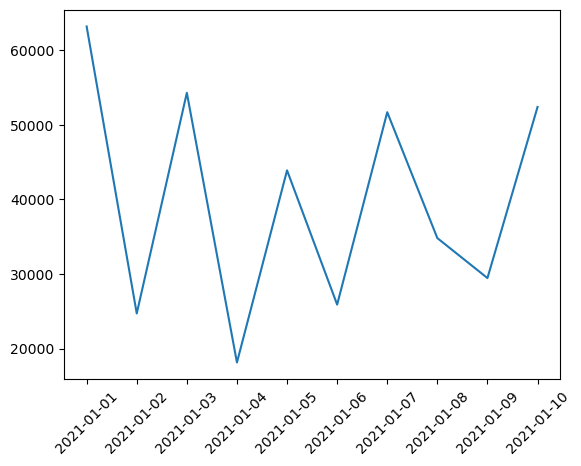

In [345]:
grouped = df.groupby("date")["revenue"].sum().reset_index()
fig, ax = plt.subplots()
ax.plot(grouped["date"], grouped["revenue"])
plt.xticks(rotation=45)
plt.show()

# 14. Create a histogram of `units_sold`.

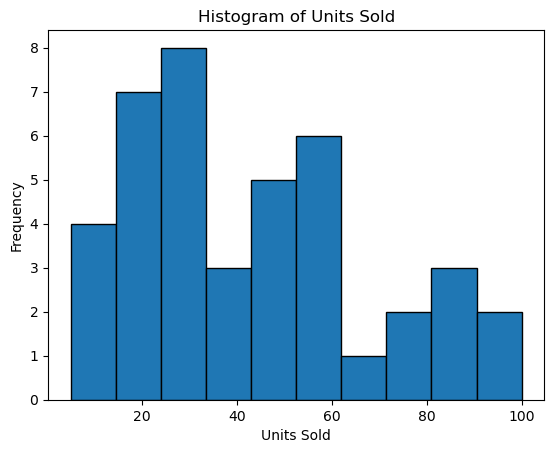

In [346]:
plt.hist(df["units_sold"], bins=10, edgecolor='black')
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Histogram of Units Sold")
plt.show()

# 15. Create a scatter plot of `units_sold` (x-axis) vs `revenue` (y-axis).

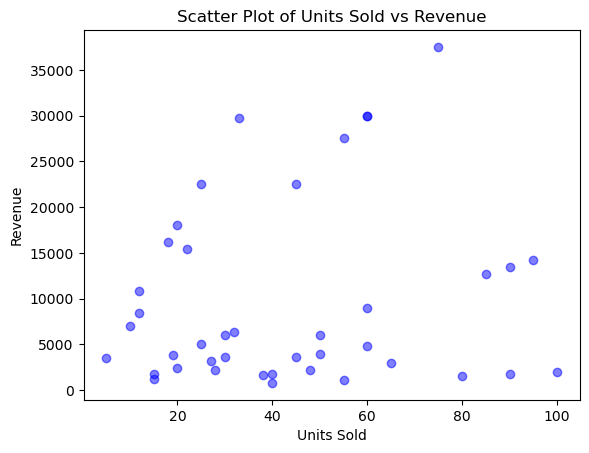

In [347]:
plt.scatter(df["units_sold"], df["revenue"], color='blue', alpha=0.5)
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.title("Scatter Plot of Units Sold vs Revenue")
plt.show()

# H1. Select the first 5 rows and the first 3 columns of df using iloc.

In [348]:
df.iloc[:5, 3]

0        Laptop
1         Chair
2    Smartphone
3       T-Shirt
4          Desk
Name: product, dtype: object

# H2. Select all rows where the `region` is "North" and only the `date`, `product`, and `units_sold` columns using loc.

In [349]:
df.loc[df["region"] == "North", ["date", "product", "units_sold"]]

,date,product,units_sold
0,2021-01-01,Laptop,25
1,2021-01-01,Chair,45
8,2021-01-02,Jacket,20
9,2021-01-03,Smartphone,75
13,2021-01-04,Headphones,60
19,2021-01-05,T-Shirt,80
21,2021-01-06,Couch,5
28,2021-01-07,Laptop,33
31,2021-01-08,Desk,19
36,2021-01-09,Jacket,50


# H3. Set the `date` column as the index of the DataFrame, then reset it back to default indexing.

In [350]:
df.set_index("date", inplace=True)
df

,region,category,product,units_sold,unit_price,revenue,discount,discounted_revenue
date,,,,,,,,
2021-01-01,North,Electronics,Laptop,25,900,22500,5,21375.0
2021-01-01,North,Furniture,Chair,45,80,3600,24,2736.0
2021-01-01,South,Electronics,Smartphone,60,500,30000,5,28500.0
2021-01-01,East,Clothing,T-Shirt,55,20,1100,48,572.0
2021-01-01,West,Furniture,Desk,30,200,6000,24,4560.0
2021-01-02,South,Furniture,Couch,10,700,7000,24,5320.0
2021-01-02,East,Electronics,Headphones,90,150,13500,5,12825.0
2021-01-02,West,Clothing,Jeans,40,45,1800,48,936.0
2021-01-02,North,Clothing,Jacket,20,120,2400,48,1248.0


In [351]:
df.reset_index()

,date,region,category,product,units_sold,unit_price,revenue,discount,discounted_revenue
0,2021-01-01,North,Electronics,Laptop,25,900,22500,5,21375.0
1,2021-01-01,North,Furniture,Chair,45,80,3600,24,2736.0
2,2021-01-01,South,Electronics,Smartphone,60,500,30000,5,28500.0
3,2021-01-01,East,Clothing,T-Shirt,55,20,1100,48,572.0
4,2021-01-01,West,Furniture,Desk,30,200,6000,24,4560.0
5,2021-01-02,South,Furniture,Couch,10,700,7000,24,5320.0
6,2021-01-02,East,Electronics,Headphones,90,150,13500,5,12825.0
7,2021-01-02,West,Clothing,Jeans,40,45,1800,48,936.0
8,2021-01-02,North,Clothing,Jacket,20,120,2400,48,1248.0
9,2021-01-03,North,Electronics,Smartphone,75,500,37500,5,35625.0


# H4. Rename the column `unit_price` to `price_per_unit` and `units_sold` to `quantity_sold`. Don't do it inplace (for consistency). Show first 6 entries

In [352]:
df.rename({"unit_price" : "price_per_unit", "units_sold" : "quantity_sold"}, axis="columns").reset_index().head()

,date,region,category,product,quantity_sold,price_per_unit,revenue,discount,discounted_revenue
0,2021-01-01,North,Electronics,Laptop,25,900,22500,5,21375.0
1,2021-01-01,North,Furniture,Chair,45,80,3600,24,2736.0
2,2021-01-01,South,Electronics,Smartphone,60,500,30000,5,28500.0
3,2021-01-01,East,Clothing,T-Shirt,55,20,1100,48,572.0
4,2021-01-01,West,Furniture,Desk,30,200,6000,24,4560.0


# H5. Create a copy of `df` called `df_copy` and drop the `discounted_revenue` column from it. Show first 5 entries.

In [353]:
df_copy = df.drop("discounted_revenue", axis=1)
display(df_copy)

,region,category,product,units_sold,unit_price,revenue,discount
date,,,,,,,
2021-01-01,North,Electronics,Laptop,25,900,22500,5
2021-01-01,North,Furniture,Chair,45,80,3600,24
2021-01-01,South,Electronics,Smartphone,60,500,30000,5
2021-01-01,East,Clothing,T-Shirt,55,20,1100,48
2021-01-01,West,Furniture,Desk,30,200,6000,24
2021-01-02,South,Furniture,Couch,10,700,7000,24
2021-01-02,East,Electronics,Headphones,90,150,13500,5
2021-01-02,West,Clothing,Jeans,40,45,1800,48
2021-01-02,North,Clothing,Jacket,20,120,2400,48


# H6. Create a new column `high_revenue` that is `True` if `revenue > 5000`, else `False`.

In [358]:
df["high_revenue"] = df["revenue"] > 5000
df

,region,category,product,units_sold,unit_price,revenue,discount,discounted_revenue,high_revenue
date,,,,,,,,,
2021-01-01,North,Electronics,Laptop,25,900,22500,5,21375.0,True
2021-01-01,North,Furniture,Chair,45,80,3600,24,2736.0,False
2021-01-01,South,Electronics,Smartphone,60,500,30000,5,28500.0,True
2021-01-01,East,Clothing,T-Shirt,55,20,1100,48,572.0,False
2021-01-01,West,Furniture,Desk,30,200,6000,24,4560.0,True
2021-01-02,South,Furniture,Couch,10,700,7000,24,5320.0,True
2021-01-02,East,Electronics,Headphones,90,150,13500,5,12825.0,True
2021-01-02,West,Clothing,Jeans,40,45,1800,48,936.0,False
2021-01-02,North,Clothing,Jacket,20,120,2400,48,1248.0,False


# H7. Find the distinct values of `region` and count how many distinct values there are.

In [359]:
df["region"].nunique()

4

# H8. Sort `df` first by `region` (ascending), and then by `revenue` (descending).

In [360]:
df.sort_values(["region", "revenue"] , ascending=[True, False])

,region,category,product,units_sold,unit_price,revenue,discount,discounted_revenue,high_revenue
date,,,,,,,,,
2021-01-08,East,Electronics,Smartphone,55,500,27500,5,26125.0,True
2021-01-05,East,Electronics,Laptop,18,900,16200,5,15390.0,True
2021-01-02,East,Electronics,Headphones,90,150,13500,5,12825.0,True
2021-01-09,East,Furniture,Couch,12,700,8400,24,6384.0,True
2021-01-06,East,Furniture,Desk,32,200,6400,24,4864.0,True
2021-01-03,East,Furniture,Chair,50,80,4000,24,3040.0,False
2021-01-04,East,Clothing,Jeans,65,45,2925,48,1521.0,False
2021-01-10,East,Clothing,Jeans,48,45,2160,48,1123.2,False
2021-01-07,East,Clothing,T-Shirt,90,20,1800,48,936.0,False


# H9. Using `loc`, for all rows where `category` is "Clothing" and `revenue > 4000`, set `discount_rate` to 0.2.

In [369]:
df.loc[(df["category"] == "Clothing") & (df["revenue"] > 4000), "discount"] = 0.2
df

,region,category,product,units_sold,unit_price,revenue,discount,discounted_revenue,high_revenue
date,,,,,,,,,
2021-01-01,North,Electronics,Laptop,25,900,22500,5.0,21375.0,True
2021-01-01,North,Furniture,Chair,45,80,3600,24.0,2736.0,False
2021-01-01,South,Electronics,Smartphone,60,500,30000,5.0,28500.0,True
2021-01-01,East,Clothing,T-Shirt,55,20,1100,48.0,572.0,False
2021-01-01,West,Furniture,Desk,30,200,6000,24.0,4560.0,True
2021-01-02,South,Furniture,Couch,10,700,7000,24.0,5320.0,True
2021-01-02,East,Electronics,Headphones,90,150,13500,5.0,12825.0,True
2021-01-02,West,Clothing,Jeans,40,45,1800,48.0,936.0,False
2021-01-02,North,Clothing,Jacket,20,120,2400,48.0,1248.0,False


# H10. Count how many times each `product` occurs in the DataFrame.

In [373]:
df["product"].value_counts()

product
Laptop        5
Chair         5
Smartphone    5
T-Shirt       5
Jacket        5
Desk          4
Couch         4
Headphones    4
Jeans         4
Name: count, dtype: int64